## About the data

**Dataset 1**

Shipping intensity in the Pacific Arctic region during August 2017. 
The value at each raster cell represents the total length, in meters, of all vessel tracks within each cell.
Resolution: 1km per pixel. 
https://arcticdata.io/catalog/view/doi:10.18739/A2SQ8QJ9S


**Dataset 2**

Vector data showing statistical areas dividing waters of the State of Alaska and the adjacent Exclusive Economic Zone (EEZ) into small units for the purpose of reporting and analyzing fishery harvest. 
https://knb.ecoinformatics.org/view/doi:10.5063/F1QR4VJK

**Dataset 3**
A polygon showing Alaska's boundary extracted from the 2022 US Census TIGER shapefiles and with updated CRS. 

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches # for creating legends

import xarray as xr
import rioxarray as rioxr
import geopandas as gpd

from rasterio.features import rasterize # for rasterizing polygons

In [2]:
pd.set_option('display.max_columns', None)

## Import data

In [3]:
# open raster
#raw_dist = rioxr.open_rasterio('https://arcticdata.io/metacat/d1/mn/v2/object/urn%3Auuid%3A6b847ab0-9a3d-4534-bf28-3a96c5fa8d72')
raw_dist = rioxr.open_rasterio('https://arcticdata.io/metacat/d1/mn/v2/object/urn%3Auuid%3A0d223f34-77fc-4ebe-8a58-459b7e575668')
raw_dist

<xarray.DataArray (band: 1, y: 2308, x: 3087)>
[7124796 values with dtype=float32]
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 -2.55e+06 -2.549e+06 ... 5.347e+05 5.357e+05
  * y            (y) float64 2.711e+06 2.71e+06 ... 4.053e+05 4.043e+05
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:       Area
    STATISTICS_MAXIMUM:  2564975.75
    STATISTICS_MEAN:     nan
    STATISTICS_MINIMUM:  0
    STATISTICS_STDDEV:   nan
    _FillValue:          -3.4e+38
    scale_factor:        1.0
    add_offset:          0.0

In [4]:
# open fishing areas polygons
fishing_areas = gpd.read_file(os.path.join(os.getcwd(), 'data', 'Alaska_Commercial_Salmon_Boundaries.gpkg'))
fishing_areas.head()

,OBJECTID,GEOMETRY_START_DATE,GEOMETRY_END_DATE,STAT_AREA,STAT_AREA_NAME,FISHERY_GROUP_CODE,GIS_SERIES_NAME,GIS_SERIES_CODE,REGION_CODE,REGISTRATION_AREA_NAME,REGISTRATION_AREA_CODE,REGISTRATION_AREA_ID,REGISTRATION_LOCATION_ABBR,MANAGEMENT_AREA_NAME,MANAGEMENT_AREA_CODE,DISTRICT_NAME,DISTRICT_CODE,DISTRICT_ID,SUBDISTRICT_NAME,SUBDISTRICT_CODE,SUBDISTRICT_ID,SECTION_NAME,SECTION_CODE,SECTION_ID,SUBSECTION_NAME,SUBSECTION_CODE,SUBSECTION_ID,COAR_AREA_CODE,CREATOR,CREATE_DATE,EDITOR,EDIT_DATE,COMMENTS,STAT_AREA_VERSION_ID,Shape_Length,Shape_Area,geometry
0,12,1975-01-01 00:00:00+00:00,NaT,33461,Tanana River mouth to Kantishna River,B,Salmon,B,3,Yukon Area,Y,None,None,Upper Yukon,YU,6 District,Y-6,None,6-A Subdistrict,6-A,None,,None,NaN,None,None,None,YU,Evelyn Russel,2006-03-26 00:00:00+00:00,Sabrina Larsen,2017-02-02 00:00:00+00:00,"Yukon District, 6 Subdistrict and 6-A Section ...",None,4.610183,0.381977,"MULTIPOLYGON (((-151.32805 64.96913, -151.3150..."
1,13,1975-01-01 00:00:00+00:00,NaT,33462,Kantishna River to Wood River,B,Salmon,B,3,Yukon Area,Y,None,None,Upper Yukon,YU,6 District,Y-6,None,6-B Subdistrict,6-B,None,,None,NaN,None,None,None,YU,Evelyn Russel,2006-03-26 00:00:00+00:00,Sabrina Larsen,2017-02-02 00:00:00+00:00,"Yukon District, 6 Subdistrict and 6-B Section ...",None,3.682421,0.321943,"MULTIPOLYGON (((-149.96255 64.70518, -149.9666..."
2,18,1978-01-01 00:00:00+00:00,NaT,33431,Toklik to Cottonwood Point,B,Salmon,B,3,Yukon Area,Y,None,None,Lower Yukon,YL,3 District,Y-3,None,,None,None,None,None,NaN,None,None,None,YL,Evelyn Russel,2006-03-26 00:00:00+00:00,Sabrina Larsen,2017-02-02 00:00:00+00:00,Yukon District and 3 Subdistrict until 1/1/1980,None,2.215641,0.198740,"MULTIPOLYGON (((-161.39853 61.55463, -161.4171..."
3,19,1980-01-01 00:00:00+00:00,NaT,33442,"Right Bank, Bishop Rock to Illinois Creek",B,Salmon,B,3,Yukon Area,Y,None,None,Upper Yukon,YU,4 District,Y-4,None,4-B Subdistrict,4-B,None,None,None,NaN,None,None,None,YU,Evelyn Russel,2006-03-26 00:00:00+00:00,Sabrina Larsen,2017-02-02 00:00:00+00:00,None,None,9.179852,0.382788,"MULTIPOLYGON (((-153.15234 65.24944, -153.0761..."
4,20,1980-01-01 00:00:00+00:00,NaT,33443,"Left Bank, Cone Point to Illinois Creek",B,Salmon,B,3,Yukon Area,Y,None,None,Upper Yukon,YU,4 District,Y-4,None,4-B Subdistrict,4-B,None,None,None,NaN,None,None,None,YU,Evelyn Russel,2006-03-26 00:00:00+00:00,Sabrina Larsen,2017-02-02 00:00:00+00:00,None,None,9.500826,0.378262,"MULTIPOLYGON (((-152.99905 65.17027, -152.9897..."


In [5]:
# open Alaska boundary
ak = gpd.read_file(os.path.join(os.getcwd(), 'data', 'alaska_perimeter','alaska_perimeter.shp'))
ak

,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,4,9,02,01785533,02,AK,Alaska,00,G4000,A,1478943541175,245377731557,+63.3473560,-152.8397334,"MULTIPOLYGON (((-1728945.561 474182.534, -1728..."



## Fishing areas preparation 
### Update column names and CRS

In [6]:
# make column names small caps
fishing_areas.columns = fishing_areas.columns.str.lower()
print(fishing_areas.columns, "\n")

# -----------------------
# check CRS
print(f"raw_dist: {raw_dist.rio.crs} \nak: {ak.crs} \nfishing_areas: {fishing_areas.crs}\n")
#print(raw_dist.rio.crs == ak.crs)

# transform fishing_areas CRS to epsg:3338
fishing_areas = fishing_areas.to_crs(ak.crs)
print('CRS match:', raw_dist.rio.crs == fishing_areas.crs)

Index(['objectid', 'geometry_start_date', 'geometry_end_date', 'stat_area',
       'stat_area_name', 'fishery_group_code', 'gis_series_name',
       'gis_series_code', 'region_code', 'registration_area_name',
       'registration_area_code', 'registration_area_id',
       'registration_location_abbr', 'management_area_name',
       'management_area_code', 'district_name', 'district_code', 'district_id',
       'subdistrict_name', 'subdistrict_code', 'subdistrict_id',
       'section_name', 'section_code', 'section_id', 'subsection_name',
       'subsection_code', 'subsection_id', 'coar_area_code', 'creator',
       'create_date', 'editor', 'edit_date', 'comments',
       'stat_area_version_id', 'shape_length', 'shape_area', 'geometry'],
      dtype='object') 

raw_dist: EPSG:3338 
ak: epsg:3338 
fishing_areas: epsg:4326

CRS match: True


### Data selection

This data includes fine scale subdivisions of the fishing areas. 
We'll be working with data from the Kodiak registration area.

In [7]:
# Registration areas:
print(fishing_areas.registration_area_name.unique())

['Yukon Area' 'Kuskokwim Area' 'Prince William Sound Area'
 'Bristol Bay Area' 'Chignik Area' 'Kodiak Area' 'Alaska Peninsula Area'
 'Cook Inlet Area' 'Norton Sound-Port Clarence Area'
 'Arctic-Kotzebue Area' 'Aleutian Islands Area' 'Atka-Amlia Islands Area'
 'Southeastern Alaska Area']


In [8]:
# select Kodiak area
kodiak = fishing_areas[fishing_areas.registration_area_name == 'Kodiak Area' ]
print('# geometries in Kodiak area:', len(kodiak) )

# geometries in Kodiak area: 118


### Plot of Kodiak fisihing area

One way to add a custom legend is to create an `Patch` object for each geometry in our plot. 

We can create a `Patch` with a custom color and legend via `mpatches.Patch()`:
```python
great_patch =  mpatches.Patch( color = 'great_color',
                               label = 'great_label')
```
To add this patch to the legend we should have created an axis, for example by calling `fig, ax = plt.subplots()` at the beginning of our plot. 
Then we add great patch to the legend:
```python
ax.legend(handles = [great_patch])
```

**Example:**

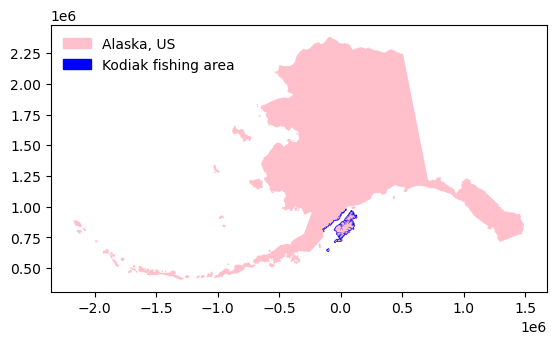

In [9]:
fig, ax = plt.subplots()
# --------------------------------------------
ak.plot(ax=ax, color = 'pink')
ak_patch = mpatches.Patch(color='pink',
                          label='Alaska, US')

# --------------------------------------------
#kodiak.dissolve().plot(ax=ax, color = 'blue')
kodiak.plot(ax=ax, color = 'blue')
kodiak_patch = mpatches.Patch(color='blue',
                              label='Kodiak fishing area')

# ------------------------------------------
# create elegend
ax.legend(handles = [ak_patch, kodiak_patch], frameon=False, loc='upper left')
#ax.legend(handles = [ak_patch, kodiak_patch], frameon=False, loc='upper left', bbox_to_anchor= (1, 1))

# ------------------------------------------
# save figure (optional)
#plt.savefig('kodiad_area_map.png', bbox_inches='tight',  dpi=100)
plt.show()

### Dissolve & explode polygons

The kodiak data is too granular for our purposes: we want to get statistics on distance travelled on each fishing district.

In [10]:
# check number of districts and rows
print(f"number of geometries: {len(kodiak)}")
print(f"number of districts: {len(kodiak.district_name.unique())}")

number of geometries: 118
number of districts: 7


We can aggregate the geometries based on the values of a column using the `dissolve()` method. 
In our case we will dissolve by district name:

In [11]:
# dissolve by district
# as_index=False indicates we want to keep the "groupby" column as a column (not index)
districts = kodiak[['geometry','district_name']].dissolve(by='district_name', as_index=False)
districts 

,district_name,geometry
0,Afognak District,"POLYGON ((117320.445 935905.028, 117387.891 93..."
1,Alitak Bay District,"POLYGON ((-20734.052 769618.550, -20652.681 76..."
2,Eastside Kodiak District,"MULTIPOLYGON (((-100323.045 633409.206, -10041..."
3,Mainland District,"MULTIPOLYGON (((-134659.359 791834.058, -13771..."
4,Northeast Kodiak District,"POLYGON ((113349.628 855371.323, 113490.376 85..."
5,Northwest Kodiak District,"POLYGON ((7822.482 849511.733, 7817.541 849495..."
6,Southwest Kodiak District,"POLYGON ((-31173.650 786489.038, -31165.811 78..."


Let's take a look at the districts:

Legend location:

We can control the legend location adding `loc` and `bbox_to_anchor` to the `legend_kwds`. 

It can be useful/clear to combine both of these to place the legend outside the graph:
`loc` indicates the corner of the legend box we want to locate
`bbox_to_anchor` is a tuple with coordiantes of where to place the corner specified in `loc`. Values between 0 and 1 are within the axes (the plot). 

See: https://matplotlib.org/stable/api/legend_api.html

<AxesSubplot:>

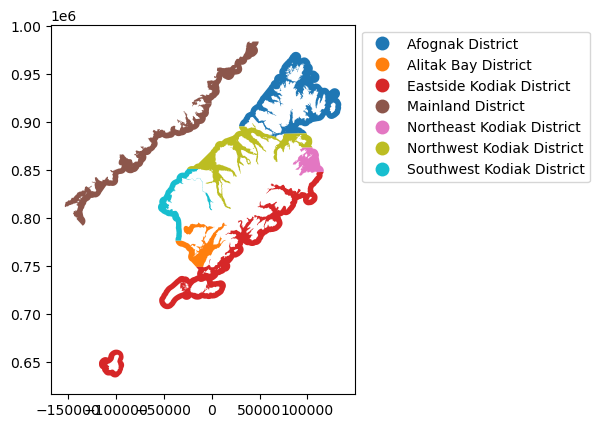

In [12]:
# https://matplotlib.org/stable/api/legend_api.html
# https://stackoverflow.com/questions/25068384/bbox-to-anchor-and-loc-in-matplotlib
districts.plot(column='district_name', 
               legend=True, 
               legend_kwds={'loc': "upper left", 'bbox_to_anchor': (1, 1)})

Notice the geometries of some our districts are multipolygons. 
To simplify our analysis and for the purpose of this lesson we will separate each multipolygon into individual polygons. 
We can do this using the `explode()` method for `gpd.GeoDataFrames`:


In [13]:
# explode polygons
# ignore_index=True resests the index 
districts = districts.explode(ignore_index=True)
districts

,district_name,geometry
0,Afognak District,"POLYGON ((117320.445 935905.028, 117387.891 93..."
1,Alitak Bay District,"POLYGON ((-20734.052 769618.550, -20652.681 76..."
2,Eastside Kodiak District,"POLYGON ((-100323.045 633409.206, -100419.680 ..."
3,Eastside Kodiak District,"POLYGON ((-14244.415 714649.799, -14326.870 71..."
4,Mainland District,"POLYGON ((-134659.359 791834.058, -137719.352 ..."
5,Mainland District,"POLYGON ((-13345.174 922271.590, -13358.061 92..."
6,Northeast Kodiak District,"POLYGON ((113349.628 855371.323, 113490.376 85..."
7,Northwest Kodiak District,"POLYGON ((7822.482 849511.733, 7817.541 849495..."
8,Southwest Kodiak District,"POLYGON ((-31173.650 786489.038, -31165.811 78..."


## Distance raster preparation

Now let's move on to our raster. 

### Squeeze
First, we have an extra unnecessary dimension. Let's get rid of it:

In [14]:
# get rid of band
print(f"Before squeeze:\ndimensions {raw_dist.dims} \ncoords: {raw_dist.coords} \n")

raw_dist = raw_dist.squeeze().drop('band')
print(f"After squeeze:\ndimensions {raw_dist.dims}\ncoords: {raw_dist.coords}")

Before squeeze:
dimensions ('band', 'y', 'x') 
coords: Coordinates:
  * band         (band) int64 1
  * x            (x) float64 -2.55e+06 -2.549e+06 ... 5.347e+05 5.357e+05
  * y            (y) float64 2.711e+06 2.71e+06 ... 4.053e+05 4.043e+05
    spatial_ref  int64 0 

After squeeze:
dimensions ('y', 'x')
coords: Coordinates:
  * x            (x) float64 -2.55e+06 -2.549e+06 ... 5.347e+05 5.357e+05
  * y            (y) float64 2.711e+06 2.71e+06 ... 4.053e+05 4.043e+05
    spatial_ref  int64 0


### Updating no-data value
Take a look at the data:

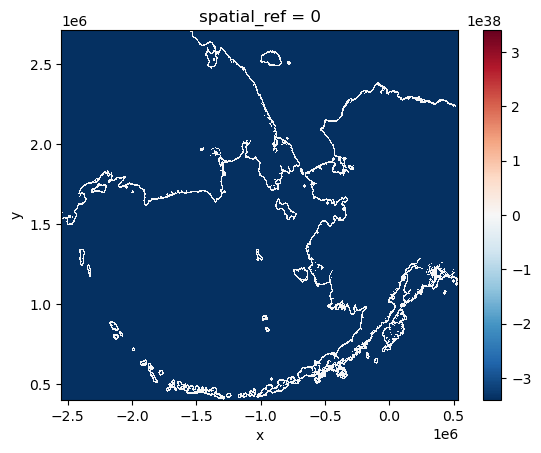

In [15]:
# this plot should make us think there are outliners/no-data values
# that are affecting the range of values
raw_dist.plot()

In [16]:
# check min and max
print(f"min: {raw_dist.min().item():,}, max: {raw_dist.max().item():,}")

# get no-data value
nodata = raw_dist.rio.nodata
print('no-data value', nodata)

min: -3.3999999521443642e+38, max: 2,564,975.75
no-data value -3.4e+38


https://docs.xarray.dev/en/stable/generated/xarray.DataArray.where.html
We can select all pixels where there is raster data using the `where()` method.
By default, `where()` will place `np.nan` (NAs) at every cell that does not satisty the condition. 

In [17]:
# select pixels with data using `where()`
raw_dist.where(raw_dist != nodata)

<xarray.DataArray (y: 2308, x: 3087)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * x            (x) float64 -2.55e+06 -2.549e+06 ... 5.347e+05 5.357e+05
  * y            (y) float64 2.711e+06 2.71e+06 ... 4.053e+05 4.043e+05
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:       Area
    STATISTICS_MAXIMUM:  2564975.75
    STATISTICS_MEAN:     nan
    STATISTICS_MINIMUM:  0
    STATISTICS_STDDEV:   nan
    _FillValue:          -3.4e+38
    scale_factor:        1.0
    add_offset:          0.0

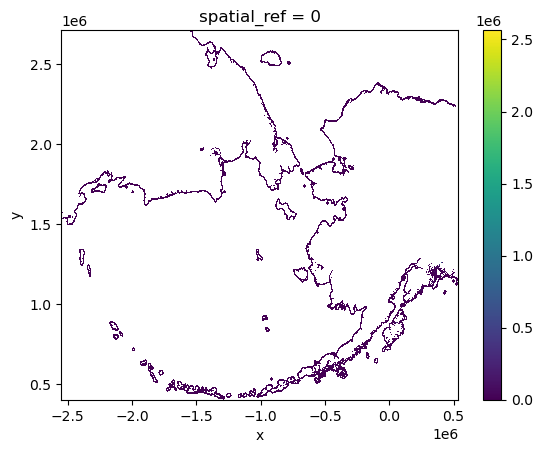

In [18]:
# check graph with nodata as nans
raw_dist.where(raw_dist != nodata).plot()

In [19]:
# transform no data values into nan (float)
dist = raw_dist.where(raw_dist != nodata)
print(f" min: {dist.min().item()}, max: {dist.max().item():,}")

 min: 0.0, max: 2,564,975.75


### Clipping

In [20]:
kodiak_dist = dist.rio.clip_box(*districts.total_bounds)
kodiak_dist

<xarray.DataArray (y: 352, x: 289)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * x            (x) float64 -1.531e+05 -1.521e+05 ... 1.338e+05 1.348e+05
  * y            (y) float64 9.843e+05 9.833e+05 ... 6.343e+05 6.333e+05
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:       Area
    STATISTICS_MAXIMUM:  2564975.75
    STATISTICS_MEAN:     nan
    STATISTICS_MINIMUM:  0
    STATISTICS_STDDEV:   nan
    scale_factor:        1.0
    add_offset:          0.0
    _FillValue:          -3.4e+38

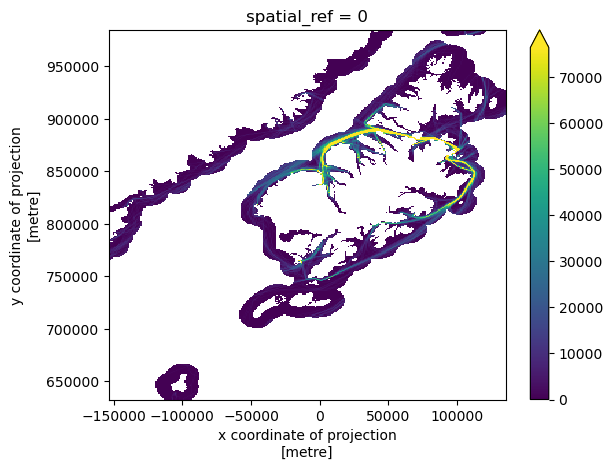

In [21]:
# do with and without robust = True
kodiak_dist.plot(robust=True)

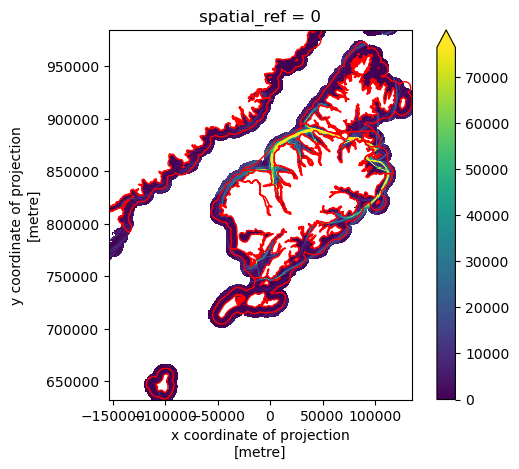

In [22]:
fig, ax = plt.subplots()
kodiak_dist.plot(ax=ax, robust=True)
districts.plot(ax=ax, edgecolor='red', color='none')
plt.show()

## Distance in a single district

To transform a geometry into a mask we can use the 
`rasterize()` function from `rasterio.features`:

https://rasterio.readthedocs.io/en/stable/api/rasterio.features.html

`rasterio` is another popular Python library to work with rasters. 
Although many of its functions have been streamlined in `rioxarray`, there are still some that have not been replaced.



In [23]:
# create raster mask based on alitak polygon
alitak_mask = rasterize(shapes = [districts.loc[1,'geometry']],  # a list of geometries
                        out_shape = kodiak_dist.shape,           # shape of outout np array (shape of raster)
                        transform = kodiak_dist.rio.transform(), # transformation of raster
                        all_touched = True)  # all pixels touched by geometries will be burned in 
print(type(alitak_mask))
alitak_mask

<class 'numpy.ndarray'>


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

(352, 289)
True
[0 1]


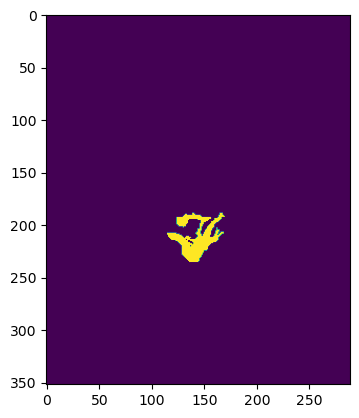

In [24]:
print(alitak_mask.shape)
print(alitak_mask.shape == kodiak_dist.shape)
print(np.unique(alitak_mask))
plt.imshow(alitak_mask)

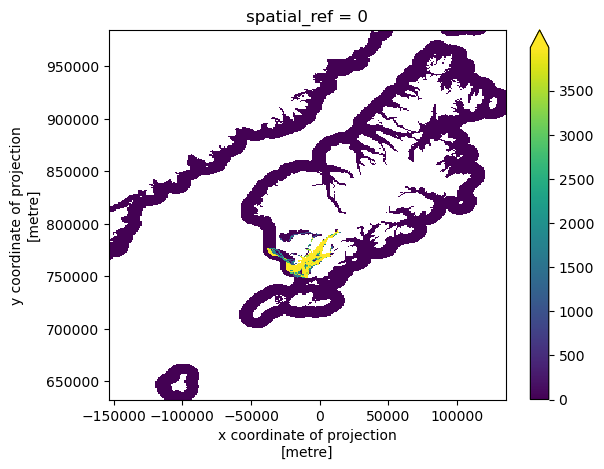

In [25]:
# apply mask to kodiak distances raster
dist_alitak = kodiak_dist * alitak_mask
dist_alitak.plot(robust=True)

In [26]:
print(f"total distance in Alitak: {dist_alitak.sum().item():,}")

total distance in Alitak: 5,606,546.5


In [28]:
# in a single cell this would be:
alitak_mask = rasterize([districts.loc[1,'geometry']],
                                    out_shape = kodiak_dist.shape,
                                    transform = kodiak_dist.rio.transform(),
                                    all_touched = True)
dist_in_alitak = (kodiak_dist * alitak_mask).sum().item()
dist_in_alitak

5606546.5

## Distance in all districts

In [29]:
for i in districts.index:
    print(i)

0
1
2
3
4
5
6
7
8


In [32]:
# calculate distance per district polygon
distances = []
for i in districts.index:
    mask = rasterize([districts.loc[i,'geometry']],
                              out_shape=kodiak_dist.shape,
                              transform=kodiak_dist.rio.transform(),
                              all_touched=True)
    dist_in_district = (kodiak_dist * mask).sum().item()
    distances.append(dist_in_district)
distances

[9804045.0,
 5606546.5,
 102465.03125,
 22725528.0,
 4788347.0,
 673996.375,
 20008534.0,
 86952560.0,
 6666639.0]

In [33]:
# add column with distance per district polygon
districts['total_distance'] = distances
districts

,district_name,geometry,total_distance
0,Afognak District,"POLYGON ((117320.445 935905.028, 117387.891 93...",9.804045e+06
1,Alitak Bay District,"POLYGON ((-20734.052 769618.550, -20652.681 76...",5.606546e+06
2,Eastside Kodiak District,"POLYGON ((-100323.045 633409.206, -100419.680 ...",1.024650e+05
3,Eastside Kodiak District,"POLYGON ((-14244.415 714649.799, -14326.870 71...",2.272553e+07
4,Mainland District,"POLYGON ((-134659.359 791834.058, -137719.352 ...",4.788347e+06
5,Mainland District,"POLYGON ((-13345.174 922271.590, -13358.061 92...",6.739964e+05
6,Northeast Kodiak District,"POLYGON ((113349.628 855371.323, 113490.376 85...",2.000853e+07
7,Northwest Kodiak District,"POLYGON ((7822.482 849511.733, 7817.541 849495...",8.695256e+07
8,Southwest Kodiak District,"POLYGON ((-31173.650 786489.038, -31165.811 78...",6.666639e+06


<AxesSubplot:>

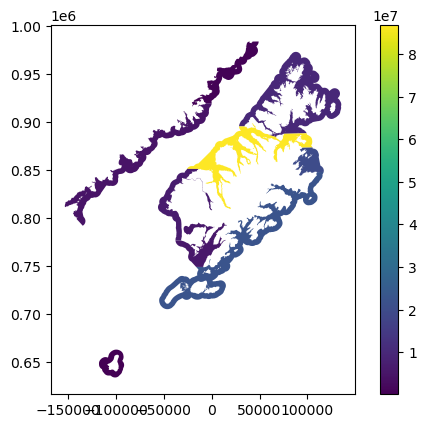

In [34]:
districts.plot(column = 'total_distance', legend=True)